In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from util import array2mat, mat2array
from analyse_util import figure_size, set_plt, set_Border

In [2]:
eval_set = np.load('/lmh_data/data/sclab/sclab/eval_dataset.npy', allow_pickle=True)
preds = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA_OPC_ODC/evaluate.npy', allow_pickle=True)

In [3]:
def _draw(mat, ignore_diag=True):
    fig = plt.figure(figsize=[7, 7])
    ax = fig.add_subplot()
#     ax.set_title('{}:{}-{}.{}.{}'.format(chrom, start, end, strand, cell_type))
    if ignore_diag:
        mat = mat.copy()
        np.fill_diagonal(mat, 0)
    sns.heatmap(mat, cmap='Reds_r', square=True)

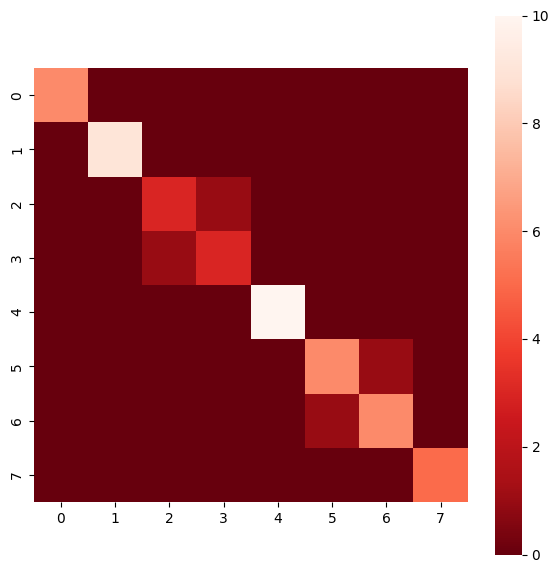

In [4]:
_target = preds[0]['target']
_draw(array2mat(_target), ignore_diag=False)

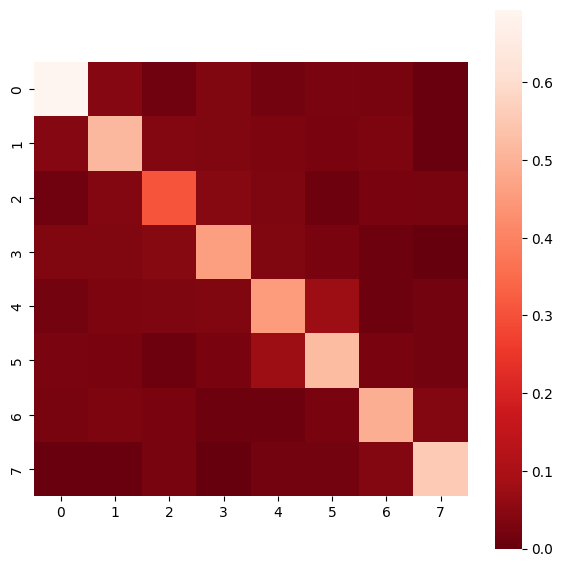

In [5]:
_predict = preds[0]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

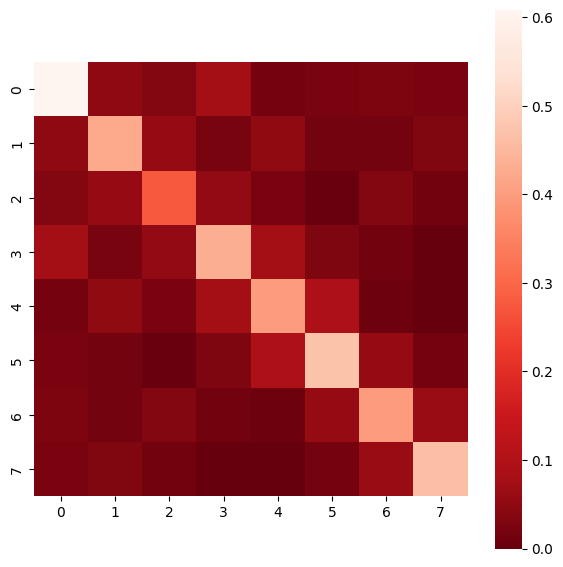

In [6]:
_predict = preds[100]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

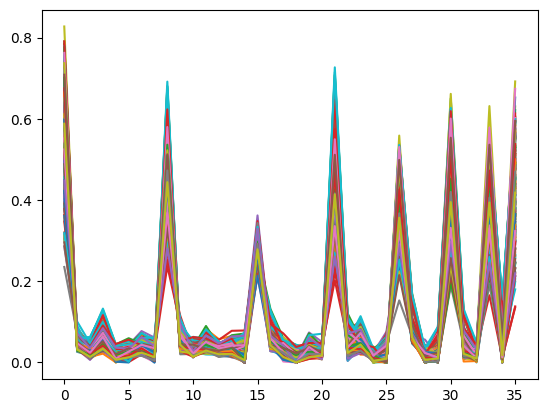

In [7]:
for pred in preds:
    _pred = pred['predict']
    _pred += abs(_pred.min())
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

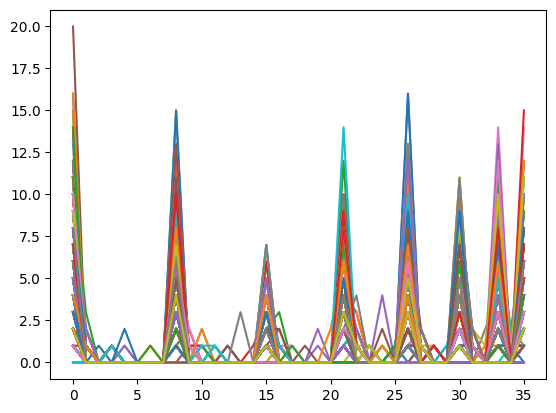

In [8]:
for pred in preds:
    _pred = pred['target']
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

In [9]:
def show_by_cell_type(cell_type):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        num += 1
        if _pred is None:
            _pred, _target = pred['predict'].copy(), pred['target'].copy()
        else:
            _pred += pred['predict']
            _target += pred['target']
    return _pred/num, _target/num

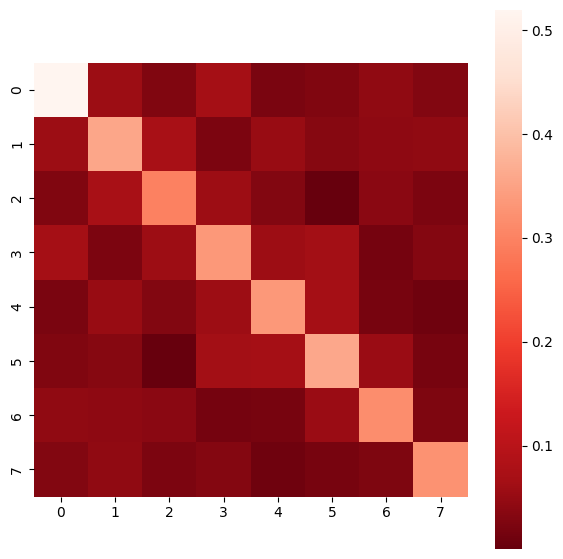

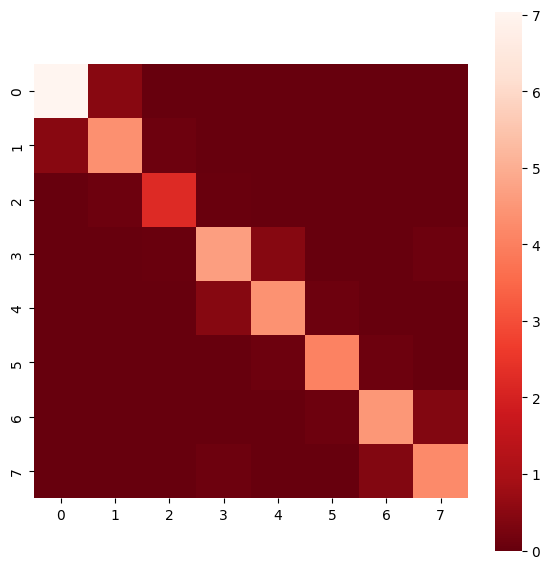

In [10]:
_pred, _target = show_by_cell_type('Astro')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

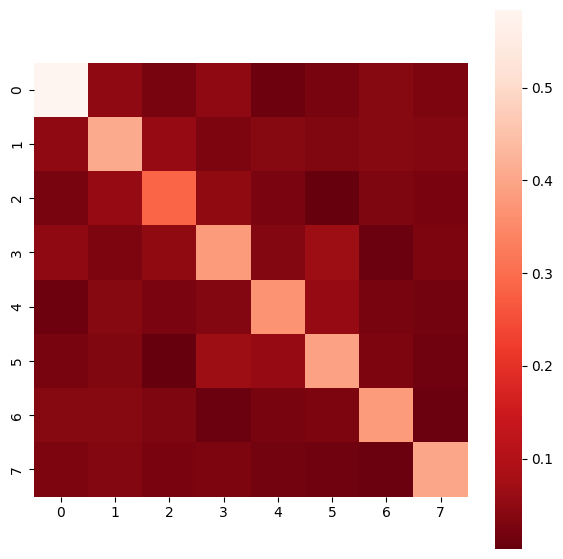

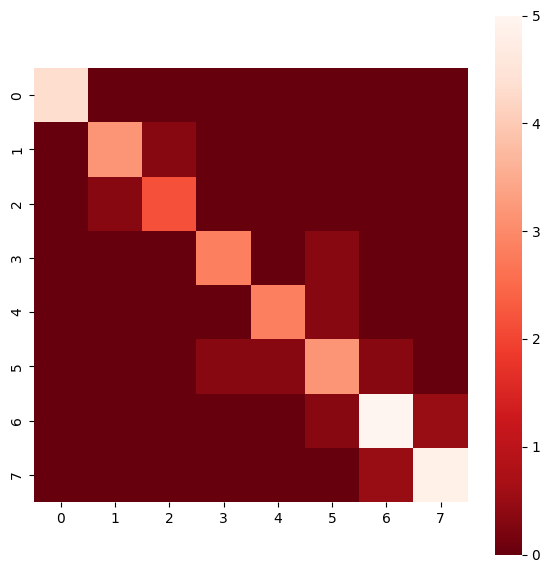

In [11]:
_pred, _target = show_by_cell_type('Endo')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

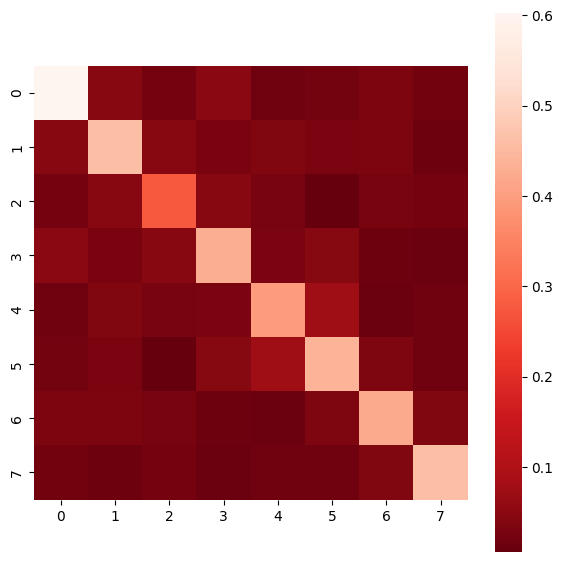

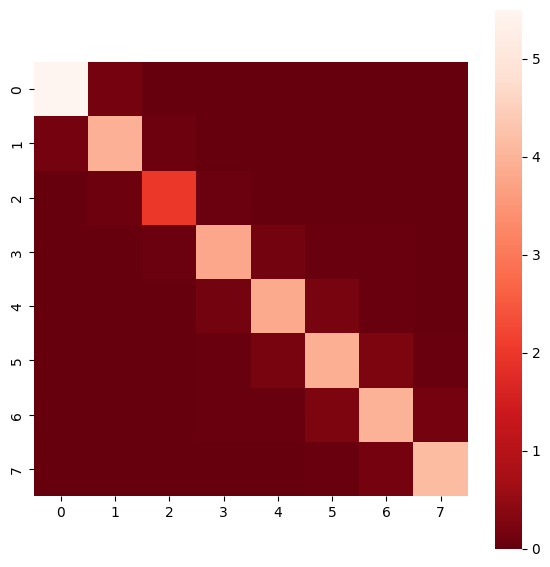

In [12]:
_pred, _target = show_by_cell_type('ODC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

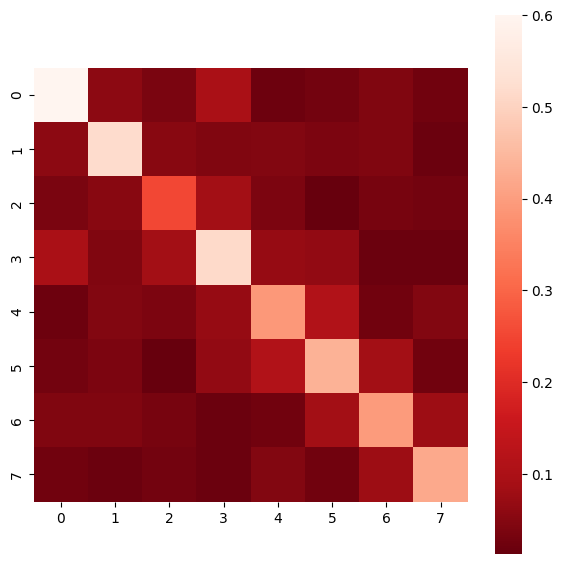

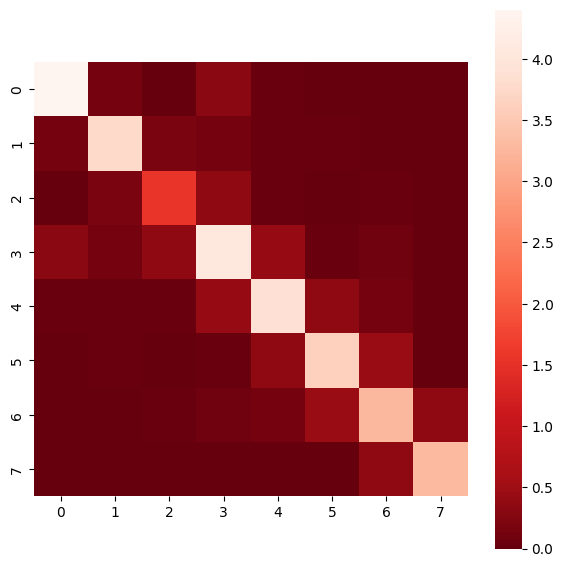

In [13]:
_pred, _target = show_by_cell_type('OPC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

In [14]:
def cal_by_cell_type(cell_type):
    _values = []
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        _values.append(stats.pearsonr(pred['predict'], pred['target'])[0])
    return _values

In [15]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.9815293627819168, pvalue=5.246236741952294e-26)
Endo: PearsonRResult(statistic=0.9575025573193003, pvalue=6.192796856981661e-20)
ODC: PearsonRResult(statistic=0.9962480825487635, pvalue=1.0011556498465397e-37)
OPC: PearsonRResult(statistic=0.9892725432621318, pvalue=5.415980703325883e-30)


In [16]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
    np.fill_diagonal(_pred, 0)
    np.fill_diagonal(_target, 0)
    _pred, _target = mat2array(_pred), mat2array(_target)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.3907361830669365, pvalue=0.018462451475471587)
Endo: PearsonRResult(statistic=0.3242713912398236, pvalue=0.05367355160805934)
ODC: PearsonRResult(statistic=0.5878906522316337, pvalue=0.00016305970040058818)
OPC: PearsonRResult(statistic=0.8068752883923553, pvalue=2.798786085812085e-09)


In [17]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
#     np.fill_diagonal(_pred, 0)
#     np.fill_diagonal(_target, 0)
#     _pred, _target = mat2array(_pred), mat2array(_target)
    _pred = _pred[_target!=0]
    _target = _target[_target!=0]
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.9794614731318788, pvalue=7.948901154877704e-24)
Endo: PearsonRResult(statistic=0.9357559129527436, pvalue=1.1913438723292e-08)
ODC: PearsonRResult(statistic=0.9950829319507133, pvalue=6.468599144769989e-56)
OPC: PearsonRResult(statistic=0.9877263009144728, pvalue=7.078517116585577e-34)


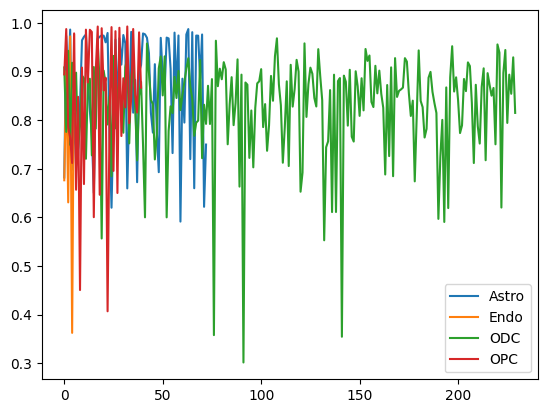

In [18]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _values = cal_by_cell_type(cell_type)
    plt.plot(list(range(0, len(_values))), _values, label=cell_type)

plt.legend()
plt.show()

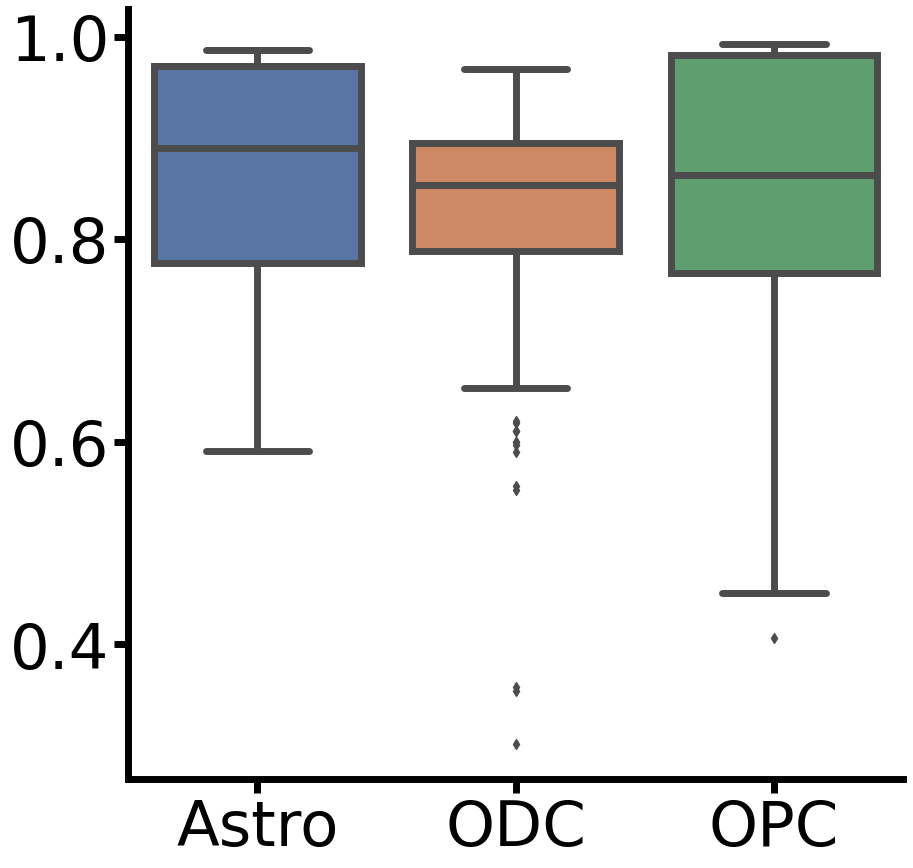

In [19]:
set_plt(figsize=(10, 10))
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()

plot_values = [cal_by_cell_type(cell_type) for cell_type in ['Astro', 'ODC', 'OPC']]
ax = sns.boxplot(data=plot_values, linewidth=figure_size['very_small'])

ax.set_xticklabels(labels=['Astro', 'ODC', 'OPC']) 

set_Border(plt.gca())
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
plt.grid(False)

# plt.xlabel("Pearson", fontsize=figure_size['ultra'])
# plt.ylabel("Cell Type", fontsize=figure_size['ultra'])
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/PDGFRA pearson(train with OPC&ODC).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [20]:
def test(cell_type):
    array = show_by_cell_type(cell_type)[0]
    mat = array2mat(array)
    np.fill_diagonal(mat, 0)
    return mat2array(mat)
plot_values = [test(cell_type) for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']]
print(stats.pearsonr(plot_values[0], plot_values[1]))
print(stats.pearsonr(plot_values[0], plot_values[2]))
print(stats.pearsonr(plot_values[0], plot_values[3]))
print(stats.pearsonr(plot_values[1], plot_values[2]))
print(stats.pearsonr(plot_values[1], plot_values[3]))
print(stats.pearsonr(plot_values[2], plot_values[3]))

PearsonRResult(statistic=0.9485598585002415, pvalue=1.4855220056715778e-18)
PearsonRResult(statistic=0.9036024718778521, pvalue=4.5318376151432016e-14)
PearsonRResult(statistic=0.8426214148746368, pvalue=1.1562789757348275e-10)
PearsonRResult(statistic=0.878318628299481, pvalue=1.9441741937042094e-12)
PearsonRResult(statistic=0.7666475702697623, pvalue=4.989592631804411e-08)
PearsonRResult(statistic=0.9327875407014748, pvalue=1.2394168132643835e-16)


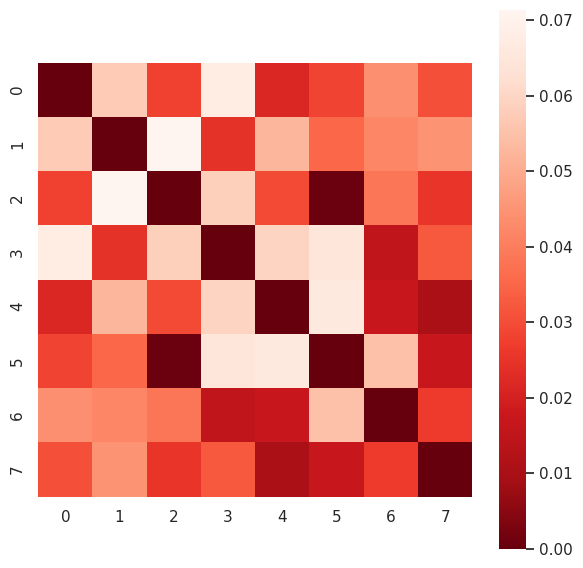

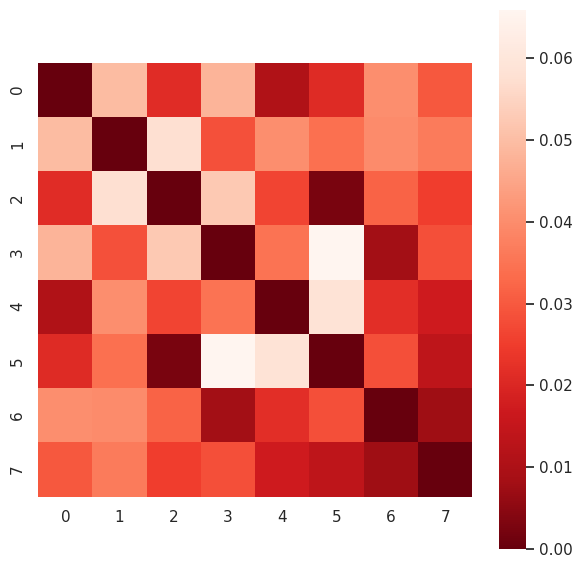

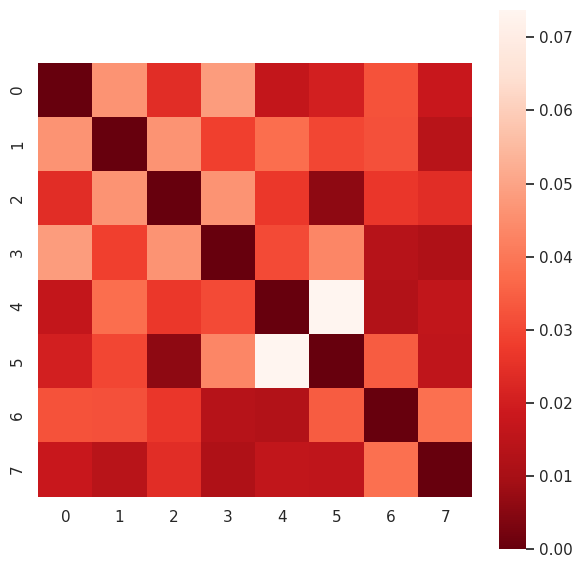

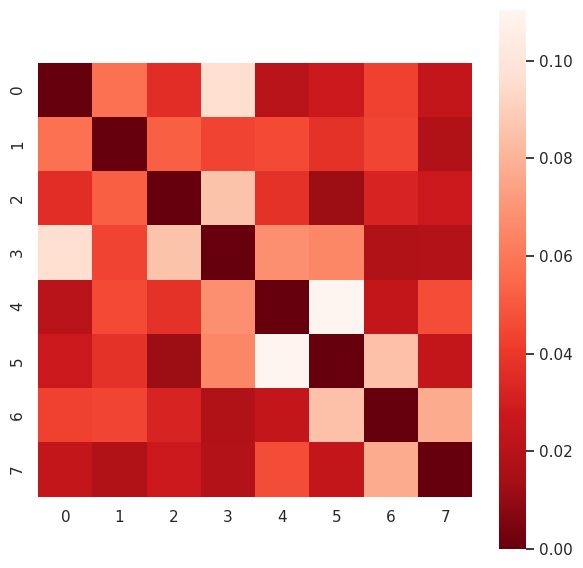

In [21]:
_draw(array2mat(show_by_cell_type('Astro')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('Endo')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('ODC')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('OPC')[0]), ignore_diag=True)

In [22]:
import anndata
import scanpy as sc

results, cell_types = [], []
for i in range(len(preds)):
    _pred = preds[i]['predict']
#     _pred = array2mat(preds[i]['predict'])
#     _pred = _pred[np.triu_indices_from(_pred, k=1)]
    results.append(_pred)
    cell_types.append(eval_set[i]['cell_type'])
results, cell_types = np.array(results), np.array(cell_types)

results = anndata.AnnData(X = results)
results.obs['cell_type'] = cell_types
results

AnnData object with n_obs × n_vars = 349 × 36
    obs: 'cell_type'

In [23]:
sc.tl.pca(results, n_comps=10, svd_solver="auto")
sc.pp.neighbors(results, metric="cosine")
sc.tl.umap(results)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


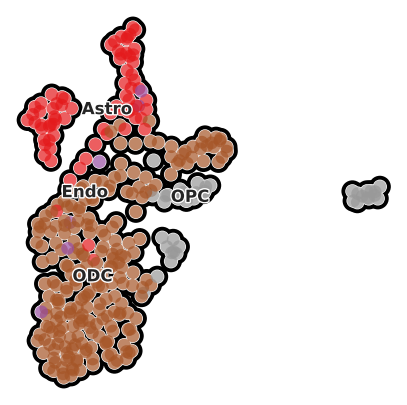

In [24]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    fig = sc.pl.umap(results, color=['cell_type'], add_outline=True, legend_loc='on data', title='',
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1', return_fig=True)
    plt.savefig('/lmh_data/work/SEE/analyse/figure_file/PDGFRA_predict_umap(train with OPC&ODC).pdf',
                format='pdf', bbox_inches='tight')
    plt.show()